<a href="https://colab.research.google.com/github/Prabandha03/Slash/blob/main/Dogs_vs_Cats_Classification_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DOGS AND CATS** - IMAGE CLASSIFICATION

#**Step-1:** Import all the necessary modules for training


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as im
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#**Step-2:** Obtain the dataset containing dogs and cats images

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-06-14 07:31:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   338MB/s    in 0.2s    

2022-06-14 07:31:17 (338 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



#**Step-3:** Extract the contents of the zip file

In [ ]:
zip_file = '/tmp/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(zip_file, 'r')
zipref.extractall('/tmp')
zipref.close()

#**Step-4:** Set the train and validation directories from base directory, along with dogs and cats directories of each directory

In [ ]:
bd = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(bd, 'train')
valid_dir = os.path.join(bd, 'validation')
traincdir = os.path.join(train_dir, 'cats')
trainddir = os.path.join(train_dir, 'dogs')
validcdir = os.path.join(valid_dir, 'cats')
validddir = os.path.join(valid_dir, 'dogs')

#**Step-5:** Check the format of file names in each directory and total count of images in each directory for further operations

In [ ]:
traincfnames = os.listdir(traincdir)
print(traincfnames[:10])

traindfnames = os.listdir(trainddir)
traindfnames.sort()
print(traindfnames[:10])

['cat.551.jpg', 'cat.969.jpg', 'cat.937.jpg', 'cat.584.jpg', 'cat.261.jpg', 'cat.418.jpg', 'cat.750.jpg', 'cat.363.jpg', 'cat.583.jpg', 'cat.538.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('Total cat images in train directory:', len(os.listdir(traincdir)))
print('Total dog images in train directory:', len(os.listdir(trainddir)))
print('Total cat images in validation directory:', len(os.listdir(validcdir)))
print('Total dog images in validation directory:', len(os.listdir(validddir)))

Total cat images in train directory: 1000
Total dog images in train directory: 1000
Total cat images in validation directory: 500
Total dog images in validation directory: 500


#**Step-6:** Explore few images of dogs and cats datasets

In [ ]:
%matplotlib inline
nrows = 5
ncols = 5
img_index = 0

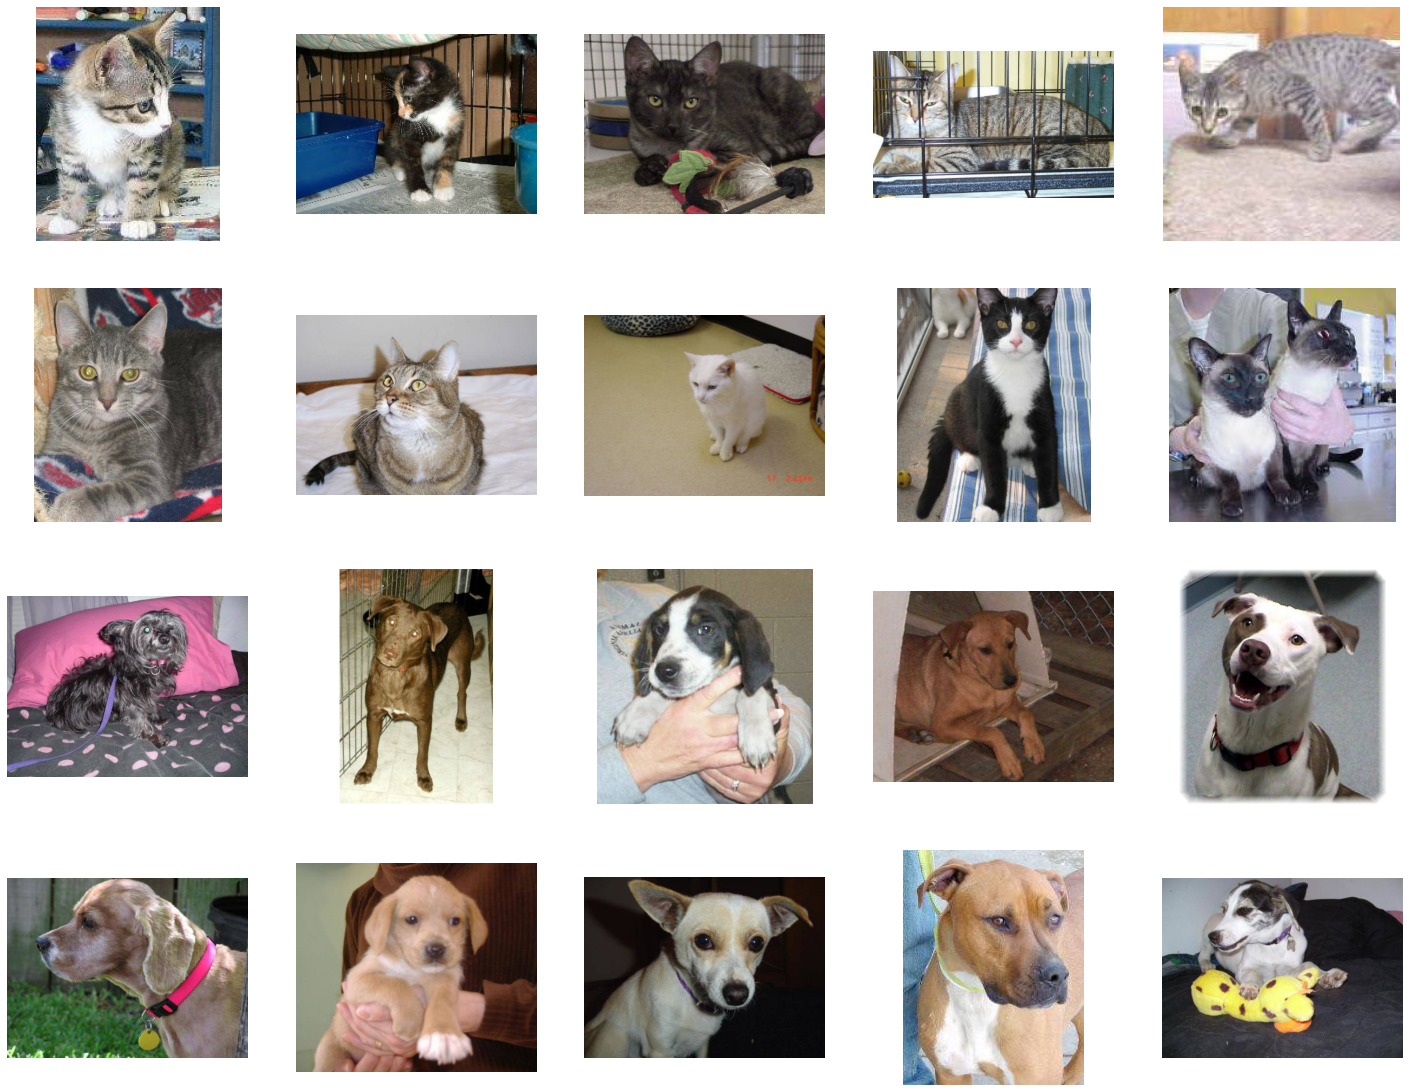

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

img_index += 10
next_cat_pix = [os.path.join(traincdir, fname)
                for fname in traincfnames[img_index-10:img_index]]
next_dog_pix = [os.path.join(trainddir, fname)
                for fname in traindfnames[img_index-10:img_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = im.imread(img_path)
  plt.imshow(img)

plt.show()

#**Step-7:** Build a small convolution network by resizing images

In [ ]:
input_image = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(input_image)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(input_image, output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

#**Step-8:** Train the model with binary-crossentropy loss

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#**Step-9:** Set data-generators for train and validation directories and train all the 2000 images belonging to 2 classes

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
valid_gen = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_gen,
      steps_per_epoch=100,
      epochs=20,
      validation_data=valid_gen,
      validation_steps=50,
      verbose=2)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 - 9s - loss: 0.8955 - acc: 0.5500 - val_loss: 0.6721 - val_acc: 0.5950 - 9s/epoch - 93ms/step
Epoch 2/20
100/100 - 8s - loss: 0.6753 - acc: 0.6310 - val_loss: 0.6676 - val_acc: 0.5960 - 8s/epoch - 84ms/step
Epoch 3/20
100/100 - 8s - loss: 0.5876 - acc: 0.6960 - val_loss: 0.5998 - val_acc: 0.6900 - 8s/epoch - 83ms/step
Epoch 4/20
100/100 - 9s - loss: 0.5148 - acc: 0.7545 - val_loss: 0.6231 - val_acc: 0.6800 - 9s/epoch - 92ms/step
Epoch 5/20
100/100 - 8s - loss: 0.4313 - acc: 0.8000 - val_loss: 0.5713 - val_acc: 0.7270 - 8s/epoch - 84ms/step
Epoch 6/20
100/100 - 8s - loss: 0.3214 - acc: 0.8595 - val_loss: 0.7278 - val_acc: 0.6950 - 8s/epoch - 83ms/step
Epoch 7/20
100/100 - 8s - loss: 0.2270 - acc: 0.9000 - val_loss: 0.8765 - val_acc: 0.7160 - 8s/epoch - 84ms/step
Epoch 8/20
100/100 - 8s - loss: 0.1538 - acc: 0.9365 - val_loss: 1.0549 - val_acc: 0.6650 - 8s/epoch - 84ms/step
Epoch 9/20
100/100 - 8s - loss: 0.1206 - acc: 0.9570 - val_loss: 0.9407 - val_acc: 0.7260 - 8s/epoch - 82ms

#**Step-10:** Plot training and validation - accuracy and loss

Text(0.5, 1.0, 'Training and validation loss')

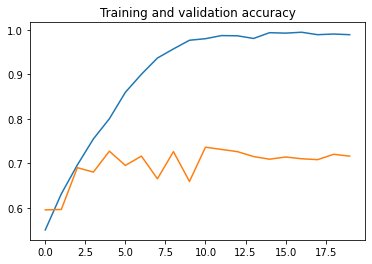

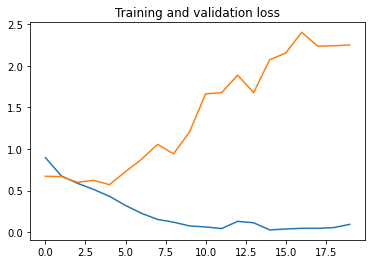

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')